In [1]:
import tensorflow as tf
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
from PIL import Image

model = tf.keras.models.load_model("model.keras")

2024-05-15 21:33:58.809993: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 21:33:58.814852: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 21:33:58.883885: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 21:34:00.014247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(129, 295)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[ 9.868793   -8.272267    0.21442296  3.070679   -7.4057117 ]]
Predicted class: American_Robin


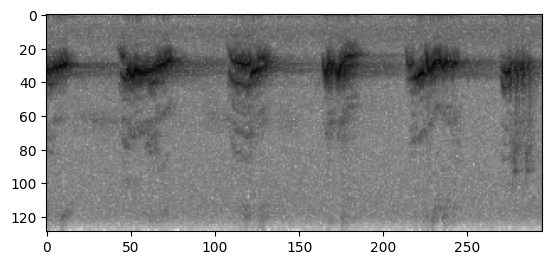

In [11]:
class_names = ['American_Robin', "Bewick's_Wren", 'Northern_Cardinal', 'Northern_Mockingbird', 'Song_Sparrow']

def scale_minmax(X, min=0.0, max=1.0):
	X_std = (X - X.min()) / (X.max() - X.min())
	X_scaled = X_std * (max - min) + min
	return X_scaled

# Charger le fichier WAV et obtenir le spectrogramme
sample_rate, samples = wavfile.read('dataset/wavfiles/14442-1.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = 255 - scale_minmax(np.log(spectrogram), 0, 255).astype(np.uint8)

# print(spectrogram.shape)
plt.imshow(spectrogram, cmap="gray")

# # Redimensionnement et mise en forme du spectrogramme

print(spectrogram.shape)
height, width = spectrogram.shape

# Faire une prédiction avec le modèle CNN
predictions = model.predict(spectrogram.reshape((1, height, width, 1)))

# # Interpréter les résultats
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print(predictions)

print("Predicted class:", predicted_class)
